In [182]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [183]:
IMAGE_SIZE = 294 
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [184]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "SelectedSkin",
    shuffle=True, 
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE 
)

Found 9773 files belonging to 6 classes.


In [185]:
class_names = dataset.class_names
class_names

['AtopicDermatitis',
 'Eczema',
 'HealthySkin',
 'PsoriasisLichenPlanus',
 'TineaRingwormCandidiasis',
 'WartsMolluscum']

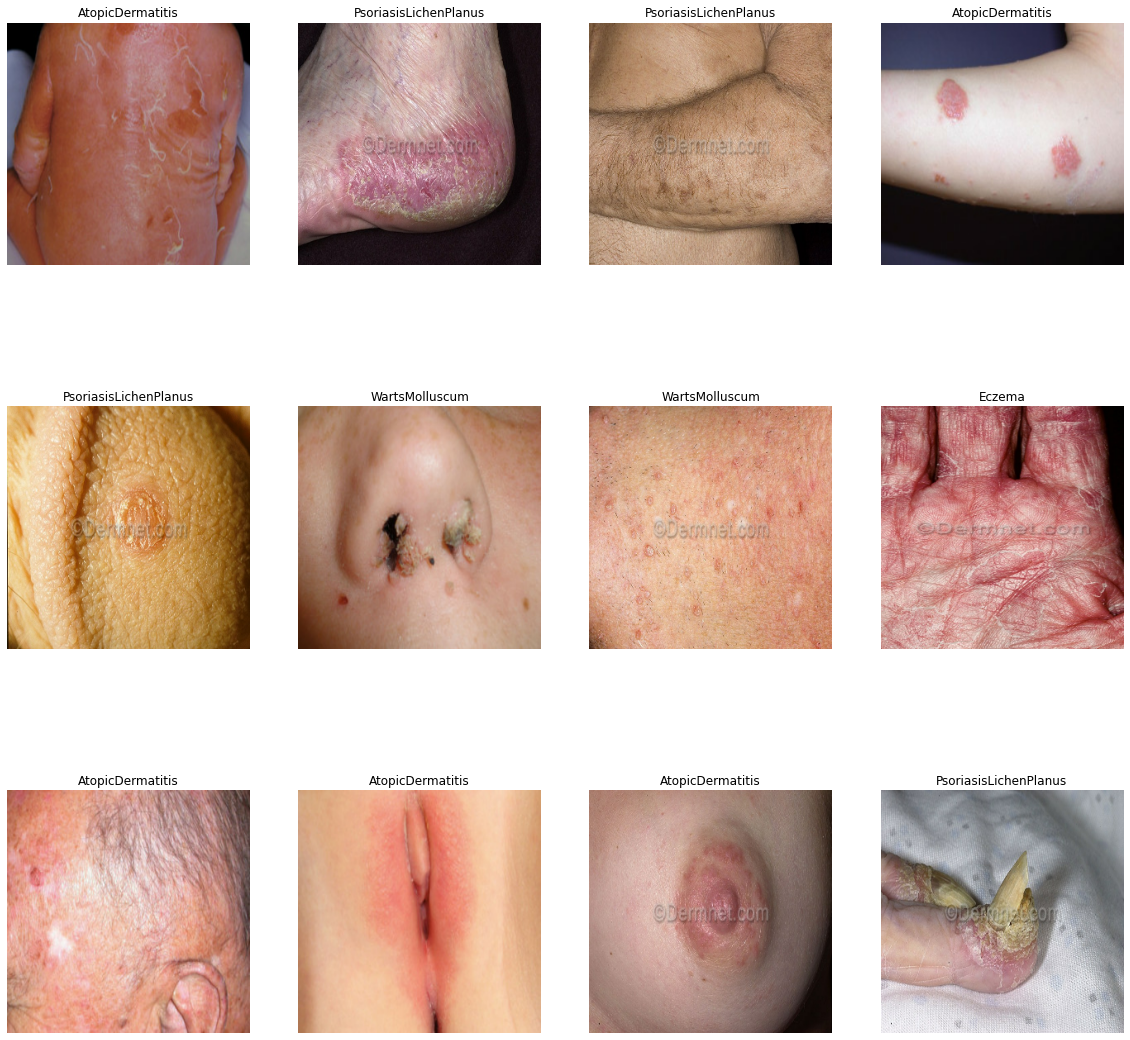

In [186]:
plt.figure(figsize=(20, 20))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off") 
    

In [187]:
len(dataset) 

306

In [188]:
80% ==> training
20% ==> 10% validation, 10% test 


SyntaxError: invalid syntax (Temp/ipykernel_12724/2918778849.py, line 1)

In [189]:
train_size = 0.8
len(dataset)*train_size 

244.8

In [190]:
train_ds= dataset.take(244) 
len(train_ds)

244

In [191]:
test_ds = dataset.skip(244) 
len(test_ds)

62

In [192]:
val_size=0.1
len(dataset)*val_size

30.6

In [193]:
val_ds = test_ds.take(30)
len(val_ds)

30

In [194]:
test_ds = test_ds.skip(30)
len(test_ds)

32

In [196]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1,shuffle=True, shuffle_size=10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    
    train_ds = ds.take(train_size)
    
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    
    return train_ds, val_ds, test_ds

In [197]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [198]:
len(train_ds)

244

In [199]:
len(val_ds)

30

In [200]:
len(test_ds)

32

In [201]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [202]:
resize_and_rescale =  tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [203]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    
])



In [226]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 6

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'), 
])
model.build(input_shape=input_shape)

In [227]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_18 (Sequential)   (None, 294, 294, 3)       0         
_________________________________________________________________
sequential_19 (Sequential)   (None, 294, 294, 3)       0         
_________________________________________________________________
conv2d_48 (Conv2D)           (32, 292, 292, 32)        896       
_________________________________________________________________
max_pooling2d_48 (MaxPooling (32, 146, 146, 32)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (32, 144, 144, 64)        18496     
_________________________________________________________________
max_pooling2d_49 (MaxPooling (32, 72, 72, 64)          0         
_________________________________________________________________
conv2d_50 (Conv2D)           (32, 70, 70, 64)        

In [228]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [229]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
244/244 [==============================] - 574s 2s/step - loss: 1.7614 - accuracy: 0.2143 - val_loss: 1.7695 - val_accuracy: 0.2177
Epoch 2/50
244/244 [==============================] - 540s 2s/step - loss: 1.7571 - accuracy: 0.2175 - val_loss: 1.7586 - val_accuracy: 0.2490
Epoch 3/50
244/244 [==============================] - 517s 2s/step - loss: 1.7068 - accuracy: 0.2708 - val_loss: 1.5880 - val_accuracy: 0.3187
Epoch 4/50
244/244 [==============================] - 513s 2s/step - loss: 1.5390 - accuracy: 0.3239 - val_loss: 1.4419 - val_accuracy: 0.3812
Epoch 5/50
244/244 [==============================] - 514s 2s/step - loss: 1.4593 - accuracy: 0.3587 - val_loss: 1.4236 - val_accuracy: 0.3646
Epoch 6/50
244/244 [==============================] - 508s 2s/step - loss: 1.4306 - accuracy: 0.3719 - val_loss: 1.3822 - val_accuracy: 0.4042
Epoch 7/50
244/244 [==============================] - 510s 2s/step - loss: 1.4003 - accuracy: 0.3862 - val_loss: 1.3831 - val_accuracy: 0.3708

In [259]:
scores = model.evaluate(test_ds)

32/32 [==============================] - 16s 498ms/step - loss: 1.1665 - accuracy: 0.5264


In [260]:
scores

[1.1664745807647705, 0.5263671875]

In [261]:
history

In [262]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 244}

In [263]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [264]:
history.history['accuracy']

[0.2142765372991562,
 0.2174862027168274,
 0.2707664668560028,
 0.32391834259033203,
 0.35871100425720215,
 0.37193477153778076,
 0.3861856460571289,
 0.391064316034317,
 0.39863911271095276,
 0.4078828990459442,
 0.411606103181839,
 0.41699832677841187,
 0.4162280261516571,
 0.43124920129776,
 0.435100793838501,
 0.44100654125213623,
 0.44434458017349243,
 0.4401078522205353,
 0.45435869693756104,
 0.4519193768501282,
 0.46373090147972107,
 0.4647579789161682,
 0.4669405519962311,
 0.47554242610931396,
 0.47233277559280396,
 0.47079214453697205,
 0.4783669412136078,
 0.4804210960865021,
 0.48555654287338257,
 0.48722556233406067,
 0.48889458179473877,
 0.4886378347873688,
 0.49544230103492737,
 0.491975873708725,
 0.5067402720451355,
 0.49775323271751404,
 0.5037873983383179,
 0.4996790289878845,
 0.5063551068305969,
 0.5155988931655884,
 0.5099499225616455,
 0.5144434571266174,
 0.5113621950149536,
 0.512132465839386,
 0.5144434571266174,
 0.5231736898422241,
 0.5281807780265808,
 0.

In [266]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

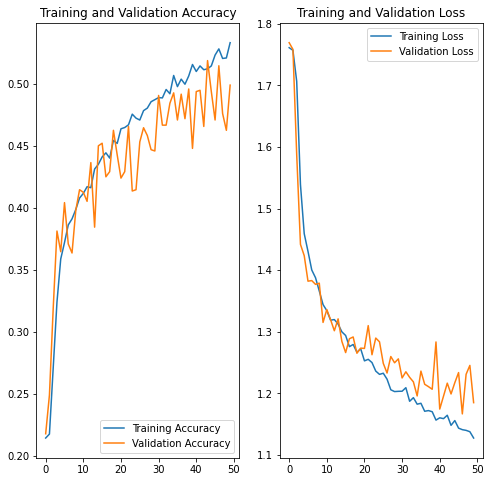

In [268]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()